# Récupération des données de mobilité humaines de Apple

> Ce Notebook présente les données de mobilités humaines depuis le début de la pandémie.

> Les données de mobilités humaines sont fournies par Apple et accessibles à l'adresse suivante : https://covid19.apple.com/mobility. Les données de mobilités commencent à partir du **13 Janvier 2020**. La référence (0%) est faite sur la valeur médiane des données du **13 Janvier 2020**.

## Importation des modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from seismic_noise import *
import pandas as pd
import urllib.request
import json

## Paramètres initiaux

In [2]:
data_path = "DATA/apple_mobility"

## Récupération des données de mobilité

Récupération des données au moyen de la fonction `load_apple_mobility()` située dans le module `seismic_noise` à la racine du répertoire.

In [3]:
# Création et préparation des dossiers
if os.path.isdir(data_path):
    if os.path.isfile(data_path + "/apple_mobility.csv"):
        filelist = [ f for f in os.listdir(data_path) ]
        for f in filelist:
            try:
                os.remove(os.path.join(data_path, f))
            except:
                pass
else:
    os.makedirs(data_path)
    
# Téléchargement des données
data = load_apple_mobility(download_data=True)

<ipython-input-3-55b3fa60541f>:14: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data = load_apple_mobility(download_data=True)


#### Récupération des données sur la France entière

In [4]:
data_country = load_apple_mobility(data_type = "country")
data_country

<ipython-input-4-50829d23b186>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_country = load_apple_mobility(data_type = "country")


,driving,transit,walking
2020-01-13,100.0,100.0,100.0
2020-01-14,101.6,100.31,105.95
2020-01-15,104.67,102.48,108.49
2020-01-16,107.25,103.75,121.22
2020-01-17,112.07,106.97,117.98
...,...,...,...
2021-07-09,174.75,210.6,143.59
2021-07-10,173.84,192.65,142.65
2021-07-11,152.9,178.19,109.58
2021-07-12,156.33,191.76,124.29


#### Récupération des données par région

In [5]:
data_region = load_apple_mobility(data_type = "region")
data_region

<ipython-input-5-c9008f3fae1b>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_region = load_apple_mobility(data_type = "region")


,region,driving,walking,transit
2020-01-13,Midi-Pyrénées Region,100.0,100.0,100.0
2020-01-14,Midi-Pyrénées Region,102.76,113.7,94.65
2020-01-15,Midi-Pyrénées Region,105.37,124.49,108.47
2020-01-16,Midi-Pyrénées Region,107.81,132.37,103.55
2020-01-17,Midi-Pyrénées Region,114.78,123.6,112.89
...,...,...,...,...
2021-07-09,Languedoc-Roussillon,288.08,296.87,631.31
2021-07-10,Languedoc-Roussillon,305.38,302.76,595.38
2021-07-11,Languedoc-Roussillon,256.02,233.97,588.09
2021-07-12,Languedoc-Roussillon,270.05,300.36,692.4


#### Récupération des données par ville

In [6]:
data_city = load_apple_mobility(data_type = "city")
data_city

<ipython-input-6-6c6c15683152>:1: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  data_city = load_apple_mobility(data_type = "city")


,city,driving,walking,transit
2020-01-13,Nice,100.0,100.0,100.0
2020-01-14,Nice,103.87,113.89,82.94
2020-01-15,Nice,103.22,102.16,108.08
2020-01-16,Nice,101.75,106.66,99.94
2020-01-17,Nice,106.53,113.18,109.62
...,...,...,...,...
2021-07-09,Lyon,170.37,157.14,548.88
2021-07-10,Lyon,148.07,136.69,441.45
2021-07-11,Lyon,123.39,98.34,431.81
2021-07-12,Lyon,133.21,113.25,510.02


## Affichage des données sur la France entière

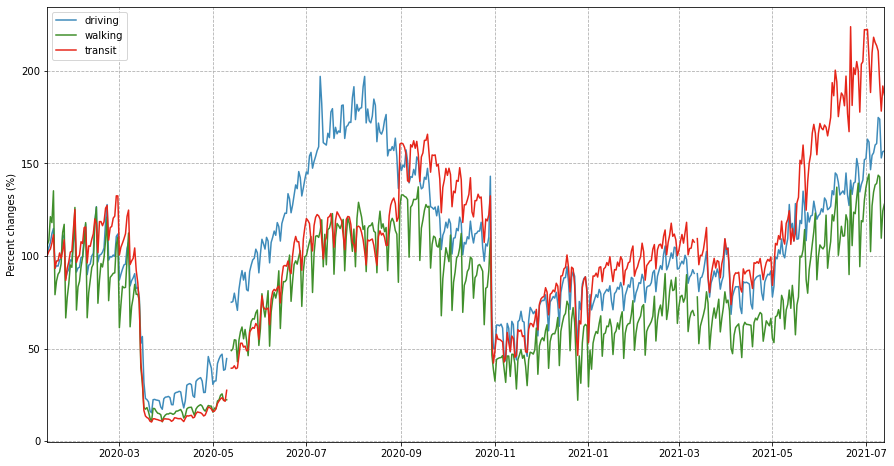

In [16]:
colors = ["#3E8BBA", "#408F2B", "#E6261A"]
plt.figure(figsize=(15,8))
plt.plot(data_country.index, data_country["driving"], label="driving", color=colors[0])
plt.plot(data_country.index, data_country["walking"], label="walking", color=colors[1])
plt.plot(data_country.index, data_country["transit"], label="transit", color=colors[2])
plt.legend()
plt.ylabel("Percent changes (%)")
plt.grid(ls='--')
plt.xlim(data_country.index[1], data_country.index[-1])
plt.show()

## Affichage des données par région

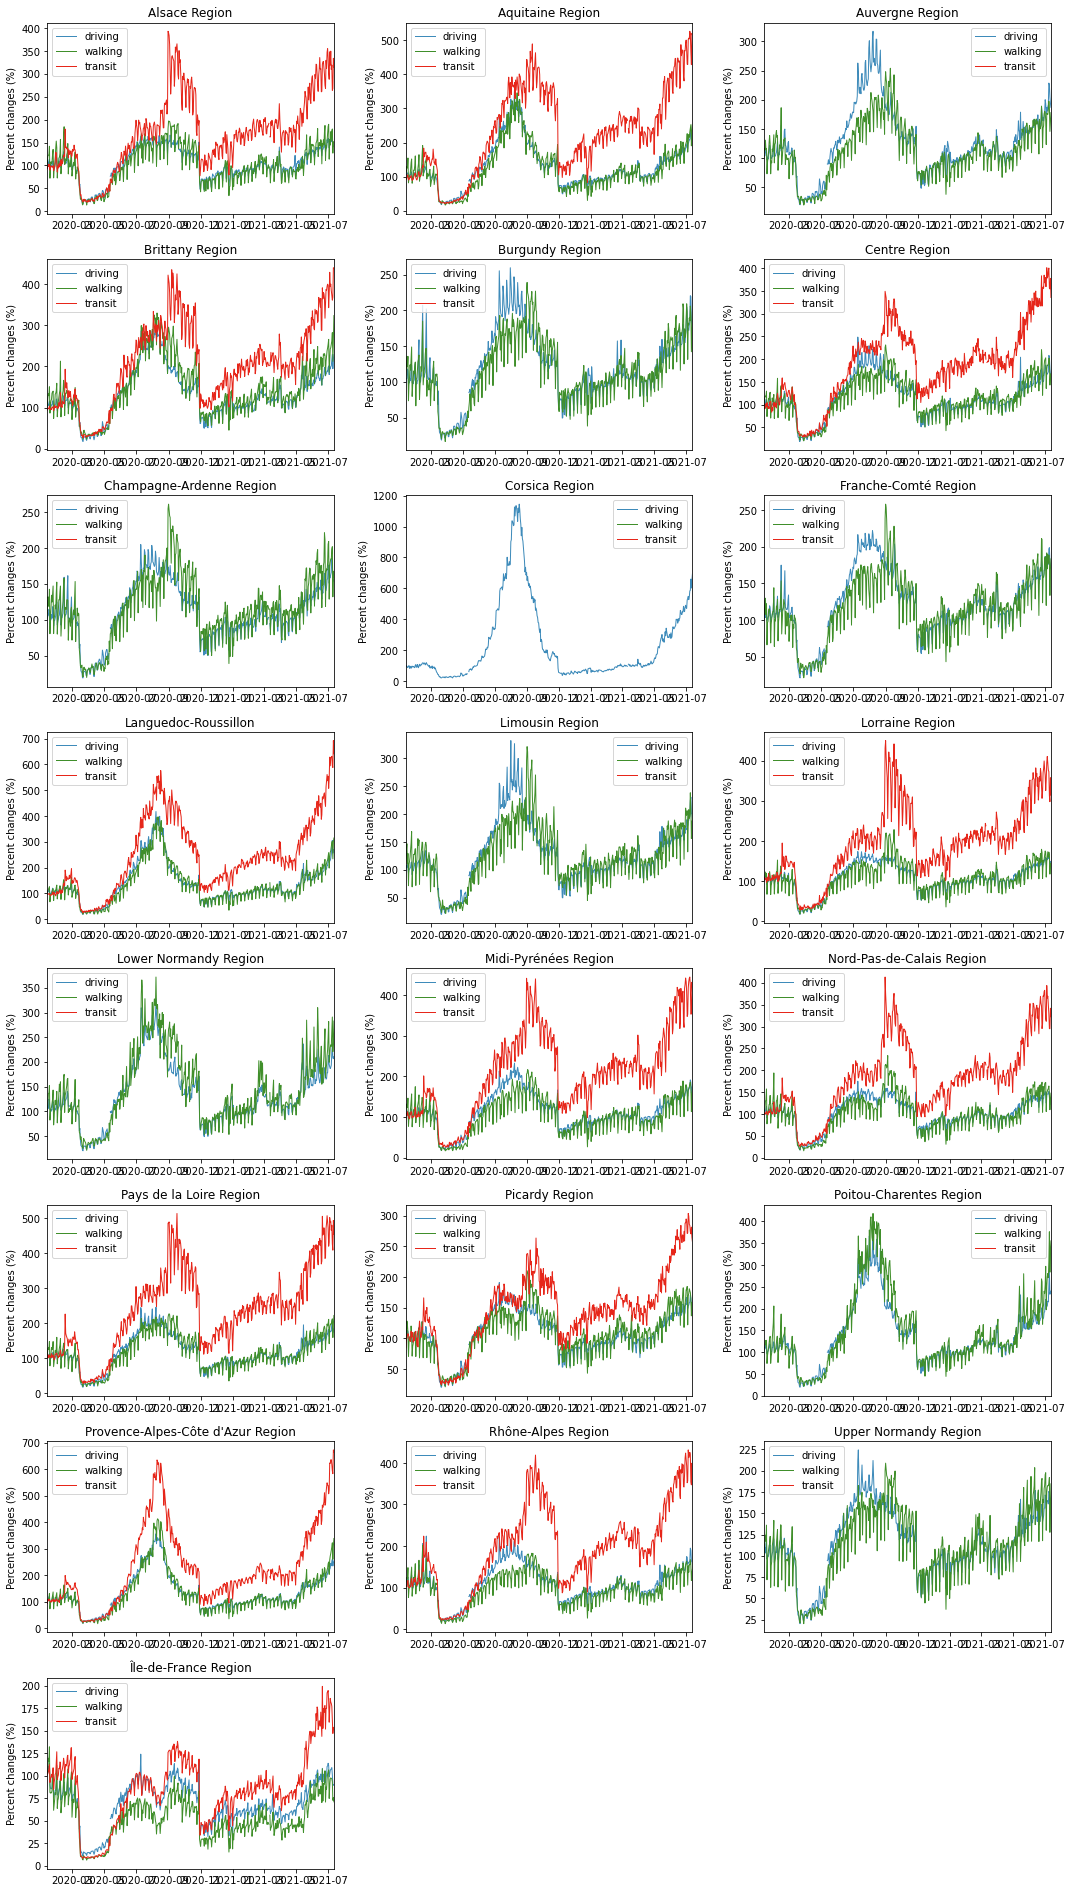

In [17]:
rg_name = list(set(data_region["region"]))
rg_name.sort()
plt.figure(figsize=(15,1.2*len(rg_name)))

for i, rg in enumerate(rg_name):
    data_rg = data_region.loc[ data_region["region"] == rg ] # Données sur l'ensemble de la région

    # Graphique sur la région
    plt.subplot(ceil(len(rg_name)/3), 3, i+1)
    plt.plot(data_rg.index, data_rg["driving"], label="driving", color=colors[0], lw=1)
    plt.plot(data_rg.index, data_rg["walking"], label="walking", color=colors[1], lw=1)
    plt.plot(data_rg.index, data_rg["transit"], label="transit", color=colors[2], lw=1)
    plt.legend()
    plt.ylabel("Percent changes (%)")
    plt.xlim(data_rg.index[1], data_rg.index[-1])
    plt.title(rg)
    
    plt.tight_layout()

## Affichage des données par ville

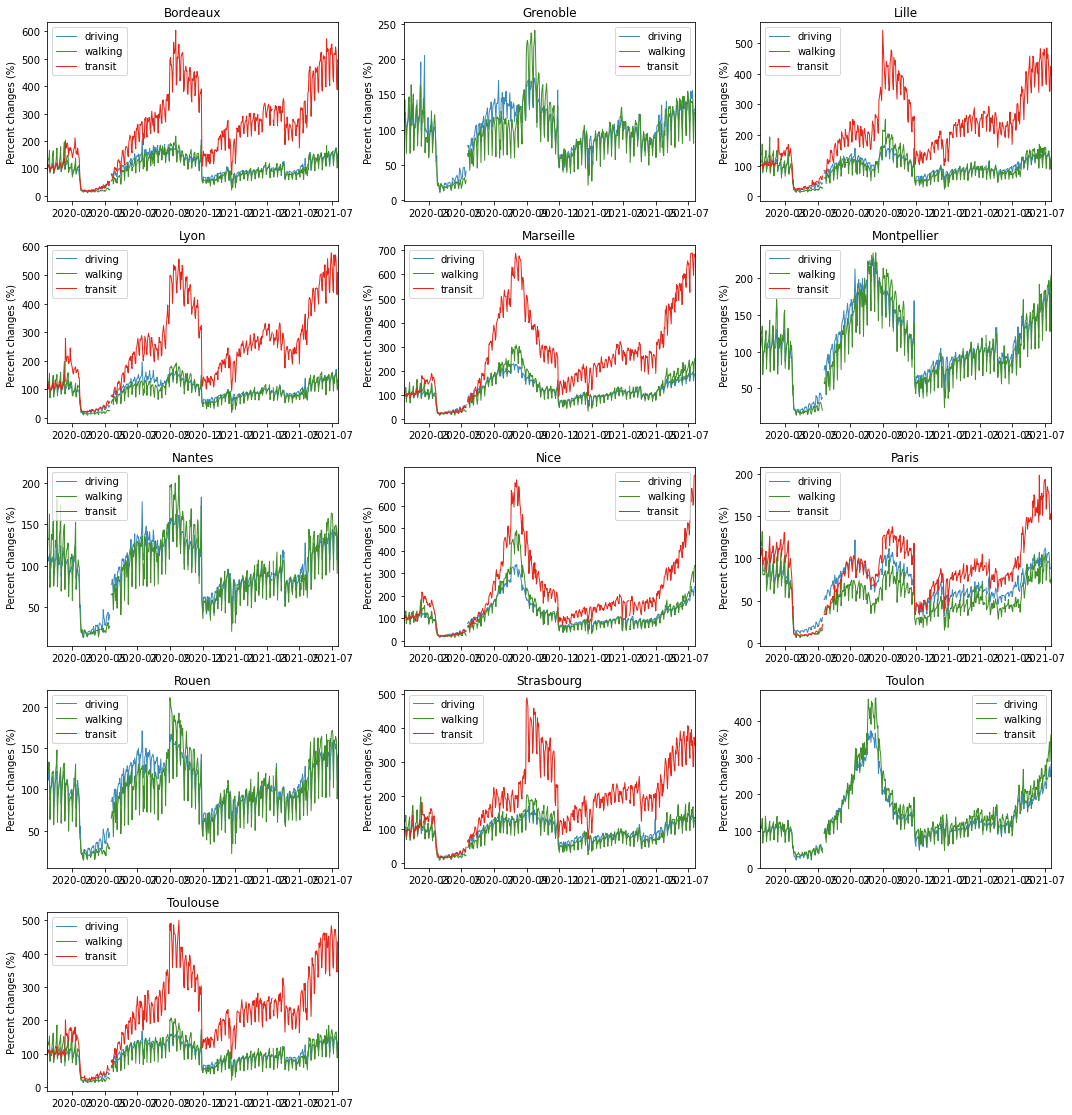

In [18]:
city_name = list(set(data_city["city"]))
city_name.sort()
plt.figure(figsize=(15,1.2*len(city_name)))

for i, city in enumerate(city_name):
    data_sub = data_city.loc[ data_city["city"] == city ] # Données sur l'ensemble de la région

    # Graphique sur la région
    plt.subplot(ceil(len(city_name)/3), 3, i+1)
    plt.plot(data_sub.index, data_sub["driving"], label="driving", color=colors[0], lw=1)
    plt.plot(data_sub.index, data_sub["walking"], label="walking", color=colors[1], lw=1)
    plt.plot(data_sub.index, data_sub["transit"], label="transit", color=colors[2], lw=1)
    plt.legend()
    plt.ylabel("Percent changes (%)")
    plt.xlim(data_sub.index[1], data_sub.index[-1])
    plt.title(city)
    
    plt.tight_layout()